In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
plt.style.use('style.mplstyle')

### Data Cleaning

In [2]:
# Loading data, set the first column (ID) as index
df = pd.read_csv('Lawsuit.csv', index_col=0)

# Choose the correct datatypes
dtypes = {'Dept': 'category', 'Gender': 'category', 'Clin': 'category', 'Cert': 'category', 'Rank': 'category'}
df = df.astype(dtypes)

# Rename the categories to be more readable
df['Dept'] = df['Dept'].cat.rename_categories(['B/M Biology', 'Physiology', 
                                               'Genetics', 'Pediatrics', 'Medicine', 'Surgery'])
df['Gender'] = df['Gender'].cat.rename_categories(['Female', 'Male'])
df['Clin'] = df['Clin'].cat.rename_categories(['Research', 'Clinical'])
df['Cert'] = df['Cert'].cat.rename_categories(['No', 'Yes'])
df['Rank'] = df['Rank'].cat.rename_categories(['Assistant', 'Associate', 'Full Professor'])

# Change column names to be more readable
df.columns = ['Dept', 'Gender', 'Emphasis', 'Certified', 'PublicationRate', 
              'Experience', 'Rank', 'Salary1994', 'Salary1995']
# Add column salary increment from 1994 to 1995
df['SalaryIncre'] = df['Salary1995'] - df['Salary1994']

df.head()

,Dept,Gender,Emphasis,Certified,PublicationRate,Experience,Rank,Salary1994,Salary1995,SalaryIncre
ID,,,,,,,,,,
1,B/M Biology,Male,Research,No,7.4,9,Full Professor,77836,84612,6776
2,B/M Biology,Male,Research,No,6.7,10,Associate,69994,78497,8503
3,B/M Biology,Male,Research,No,8.1,6,Assistant,62872,67756,4884
4,B/M Biology,Male,Clinical,Yes,5.1,27,Full Professor,155196,173220,18024
5,B/M Biology,Male,Research,No,7.0,10,Full Professor,89268,96099,6831


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 261 entries, 1 to 261
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Dept             261 non-null    category
 1   Gender           261 non-null    category
 2   Emphasis         261 non-null    category
 3   Certified        261 non-null    category
 4   PublicationRate  261 non-null    float64 
 5   Experience       261 non-null    int64   
 6   Rank             261 non-null    category
 7   Salary1994       261 non-null    int64   
 8   Salary1995       261 non-null    int64   
 9   SalaryIncre      261 non-null    int64   
dtypes: category(5), float64(1), int64(4)
memory usage: 14.2 KB


In [4]:
df.describe(include=np.number)

,PublicationRate,Experience,Salary1994,Salary1995,SalaryIncre
count,261.000000,261.000000,261.000000,261.000000,261.000000
mean,4.932184,10.229885,153593.344828,168906.655172,15313.310345
std,1.944430,6.227176,80469.666720,88778.425411,8926.154373
min,1.300000,1.000000,34514.000000,38675.000000,2312.000000
25%,3.200000,6.000000,90771.000000,99972.000000,8494.000000
50%,4.400000,9.000000,133284.000000,148117.000000,12955.000000
75%,6.900000,14.000000,200543.000000,218955.000000,19364.000000
max,8.700000,37.000000,428876.000000,472589.000000,53460.000000


In [5]:
df.describe(include='category')

,Dept,Gender,Emphasis,Certified,Rank
count,261,261,261,261,261
unique,6,2,2,2,3
top,Medicine,Male,Clinical,Yes,Assistant
freq,80,155,160,188,112


### EDA

#### Categorical

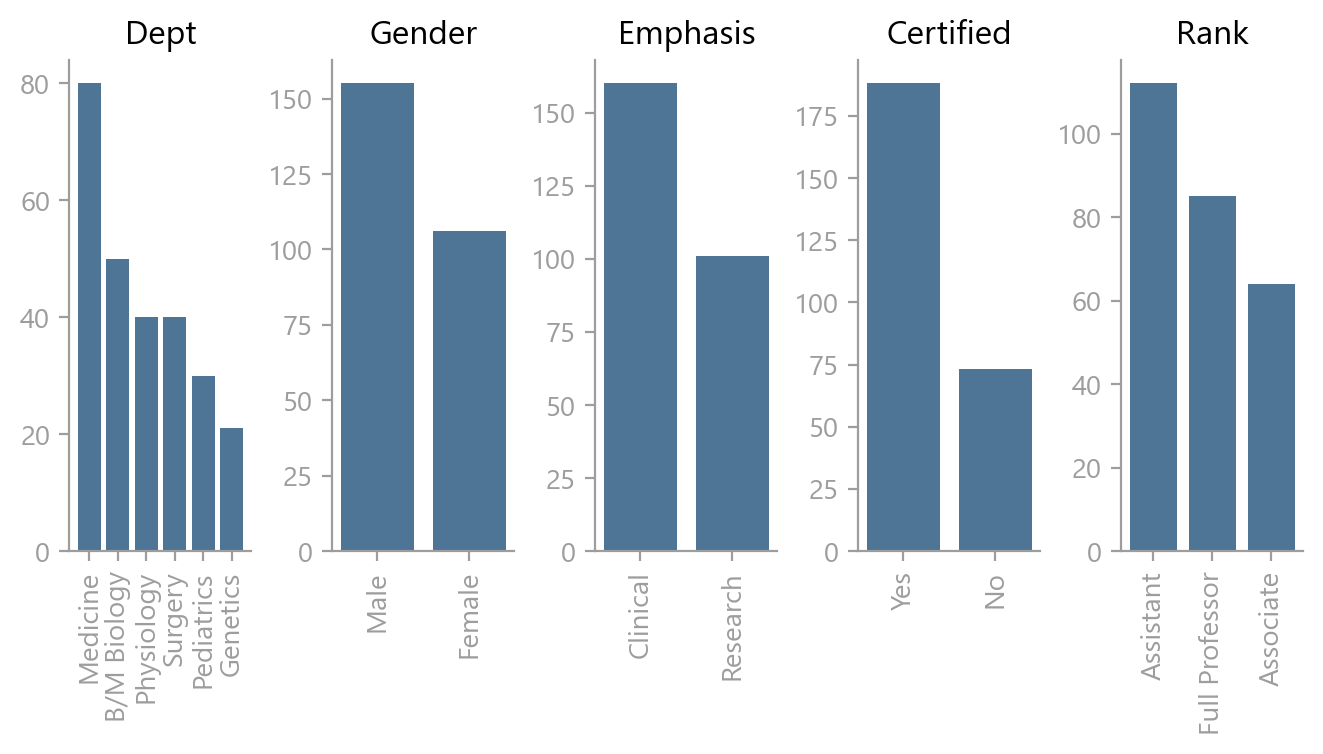

In [6]:
cats = df.select_dtypes('category').columns
fig, axs = plt.subplots(1, 5, layout='constrained')
for i in range(axs.shape[0]):
    data = df[cats[i]].value_counts()
    axs[i].bar(range(len(data)), data.values)
    axs[i].set_xticks(ticks = range(len(data)), labels=data.index, rotation=90)
    axs[i].set_title(cats[i])

In [7]:
pct_line = df.groupby('Gender')['Dept'].count().div(df.groupby('Gender')['Dept'].count().sum())

C:\Users\Shih\AppData\Local\Temp\ipykernel_24484\1321866222.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pct_line = df.groupby('Gender')['Dept'].count().div(df.groupby('Gender')['Dept'].count().sum())


In [8]:
pct_line

Gender
Female    0.40613
Male      0.59387
Name: Dept, dtype: float64

In [9]:
bar = df.groupby(['Gender', 'Rank'])['Emphasis'].count().unstack().div(df.groupby(['Gender', 'Rank'])['Emphasis'].count().unstack().sum(), axis=1).T

C:\Users\Shih\AppData\Local\Temp\ipykernel_24484\656274516.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bar = df.groupby(['Gender', 'Rank'])['Emphasis'].count().unstack().div(df.groupby(['Gender', 'Rank'])['Emphasis'].count().unstack().sum(), axis=1).T


In [10]:
bar

Gender,Female,Male
Rank,,
Assistant,0.616071,0.383929
Associate,0.328125,0.671875
Full Professor,0.188235,0.811765


C:\Users\Shih\AppData\Local\Temp\ipykernel_24484\117380182.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.axhline(y=pct_line[0], ls='--', color='0')


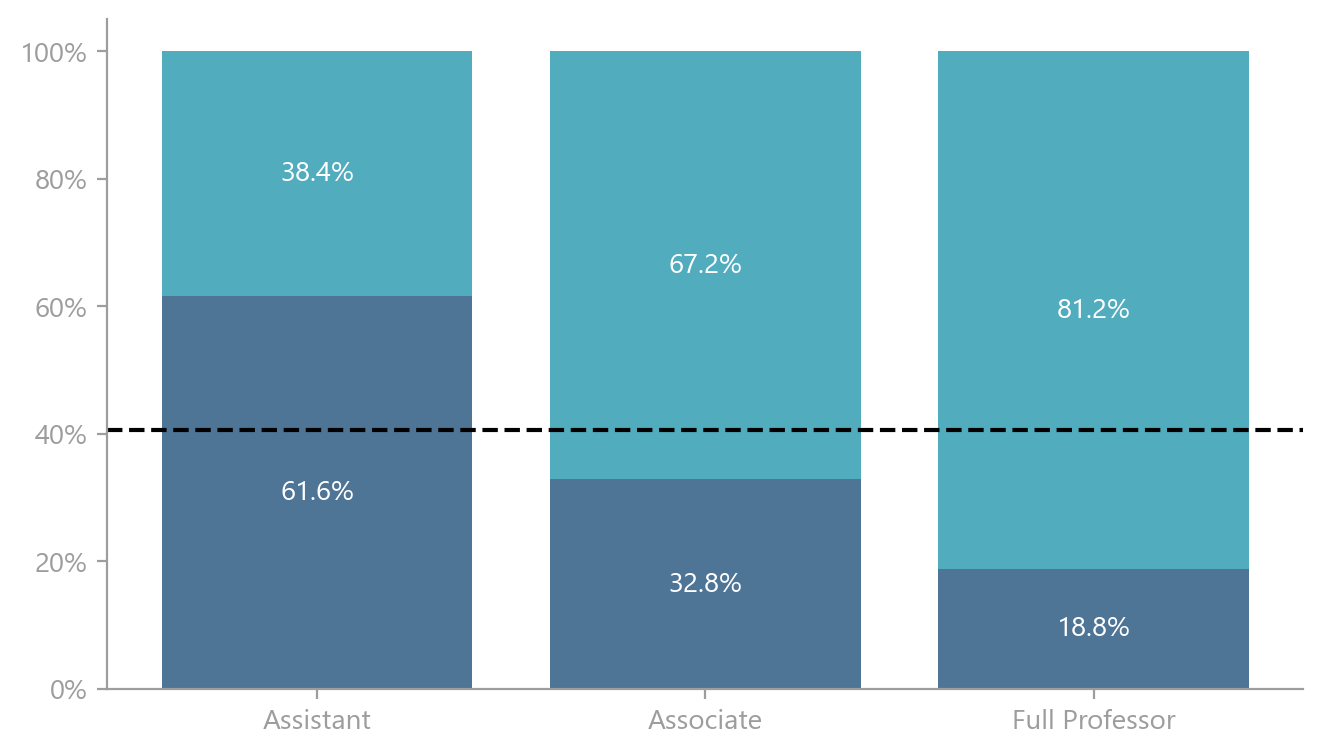

In [11]:
bottom = np.zeros(bar.shape[0])
fig, ax = plt.subplots(layout='constrained')
for col in bar.columns:
    bars = ax.bar(bar.index.to_list(), bar[col], label=col, bottom=bottom)
    ax.bar_label(bars, labels=[f'{p * 100:.1f}%' for p in bar[col]], label_type='center', color='1')
    bottom += bar[col]
ax.axhline(y=pct_line[0], ls='--', color='0')
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1, decimals=0))

In [12]:
df_dep_gen = df.groupby(['Dept', 'Gender'])['Emphasis'].count()
df_dep_gen = df_dep_gen.unstack()
df_dep_gen

C:\Users\Shih\AppData\Local\Temp\ipykernel_24484\2151436005.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_dep_gen = df.groupby(['Dept', 'Gender'])['Emphasis'].count()


Gender,Female,Male
Dept,,
B/M Biology,20,30
Physiology,20,20
Genetics,11,10
Pediatrics,20,10
Medicine,30,50
Surgery,5,35


In [13]:
df_dep_gen_per = df_dep_gen.div(df_dep_gen.sum(axis=1), axis=0) * 100
df_dep_gen_per

Gender,Female,Male
Dept,,
B/M Biology,40.000000,60.000000
Physiology,50.000000,50.000000
Genetics,52.380952,47.619048
Pediatrics,66.666667,33.333333
Medicine,37.500000,62.500000
Surgery,12.500000,87.500000


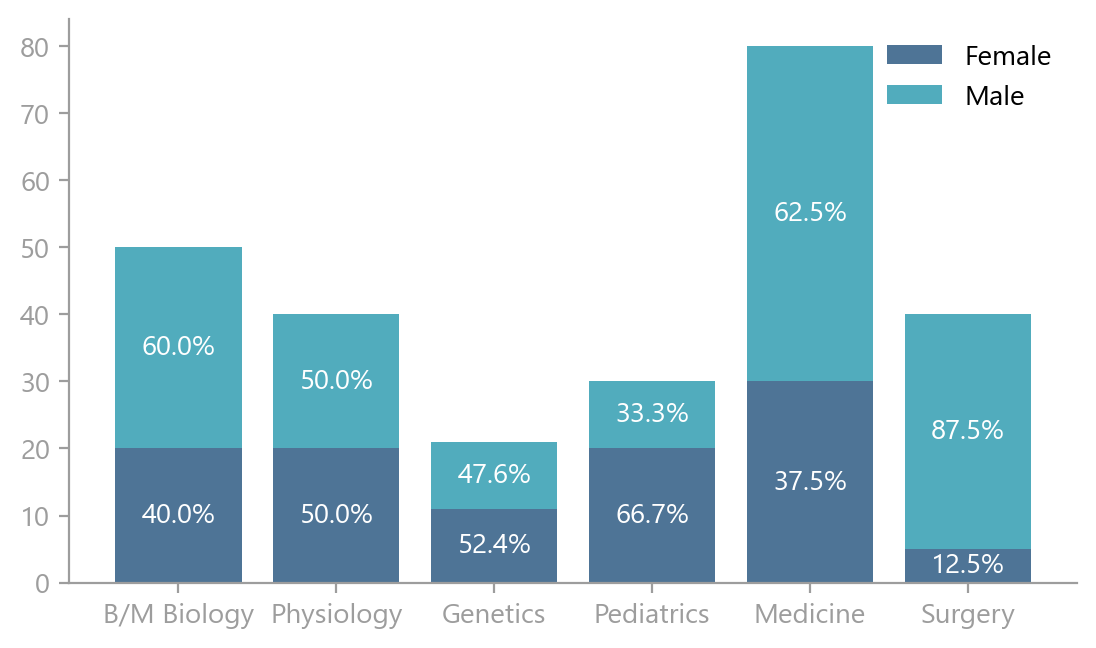

In [14]:
fig, ax = plt.subplots()
bottom = np.zeros(df_dep_gen.shape[0])
for col in df_dep_gen.columns:
    bars = ax.bar(df_dep_gen.index.to_list(), df_dep_gen[col], label=col, bottom=bottom)
    ax.bar_label(bars, labels=[f'{p:.1f}%' for p in df_dep_gen_per[col]], label_type='center', color='1')
    bottom += df_dep_gen[col]

ax.legend()

C:\Users\Shih\AppData\Local\Temp\ipykernel_24484\3751467267.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_gen = df.groupby([cats[counter], 'Gender']).count()
C:\Users\Shih\AppData\Local\Temp\ipykernel_24484\3751467267.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_gen = df.groupby([cats[counter], 'Gender']).count()
C:\Users\Shih\AppData\Local\Temp\ipykernel_24484\3751467267.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and si

Text(0.5, 0.98, 'Counts by Gender')

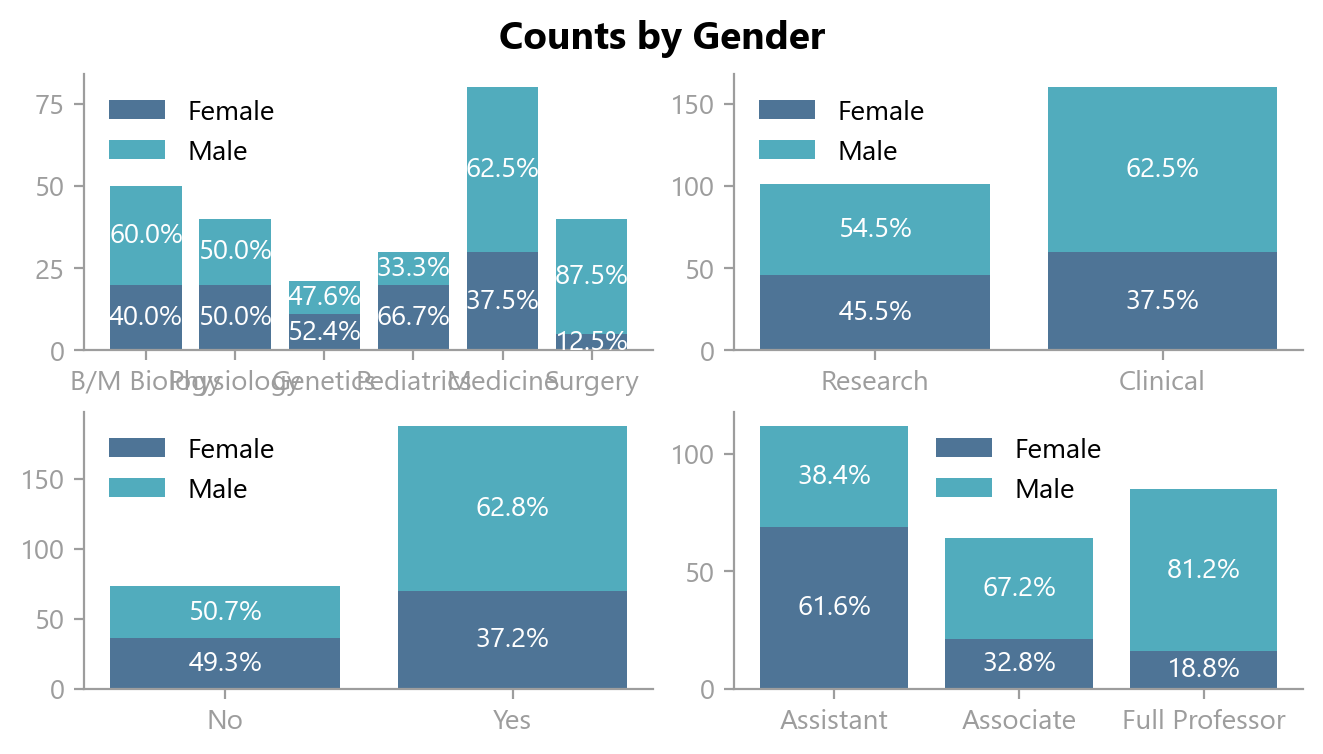

In [15]:
fig, axs = plt.subplots(2, 2, layout='constrained')
cats = df.select_dtypes('category').columns.to_list()
cats.remove('Gender')
title = 'Gender'
counter = 0
for i in range(axs.shape[0]):
    for j in range(axs.shape[1]):
        df_gen = df.groupby([cats[counter], 'Gender']).count()
        df_gen = df_gen.iloc[:, 0].unstack()
        df_gen_per = df_gen.div(df_gen.sum(axis=1), axis=0) * 100
        bottom = np.zeros(df_gen.shape[0])
        for col in df_gen.columns:
            bars = axs[i][j].bar(df_gen.index.to_list(), df_gen[col], label=col, bottom=bottom)
            axs[i][j].bar_label(bars, labels=[f'{p:.1f}%' for p in df_gen_per[col]], label_type='center', color='1')
            bottom += df_gen[col]
        counter += 1
        axs[i][j].legend()
fig.suptitle(f'Counts by {title}')

C:\Users\Shih\AppData\Local\Temp\ipykernel_24484\1453719388.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_gen = df.groupby([cats[counter], 'Dept']).count()
C:\Users\Shih\AppData\Local\Temp\ipykernel_24484\1453719388.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_gen = df.groupby([cats[counter], 'Dept']).count()
C:\Users\Shih\AppData\Local\Temp\ipykernel_24484\1453719388.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silenc

Text(0.5, 0.98, 'Counts by Dept')

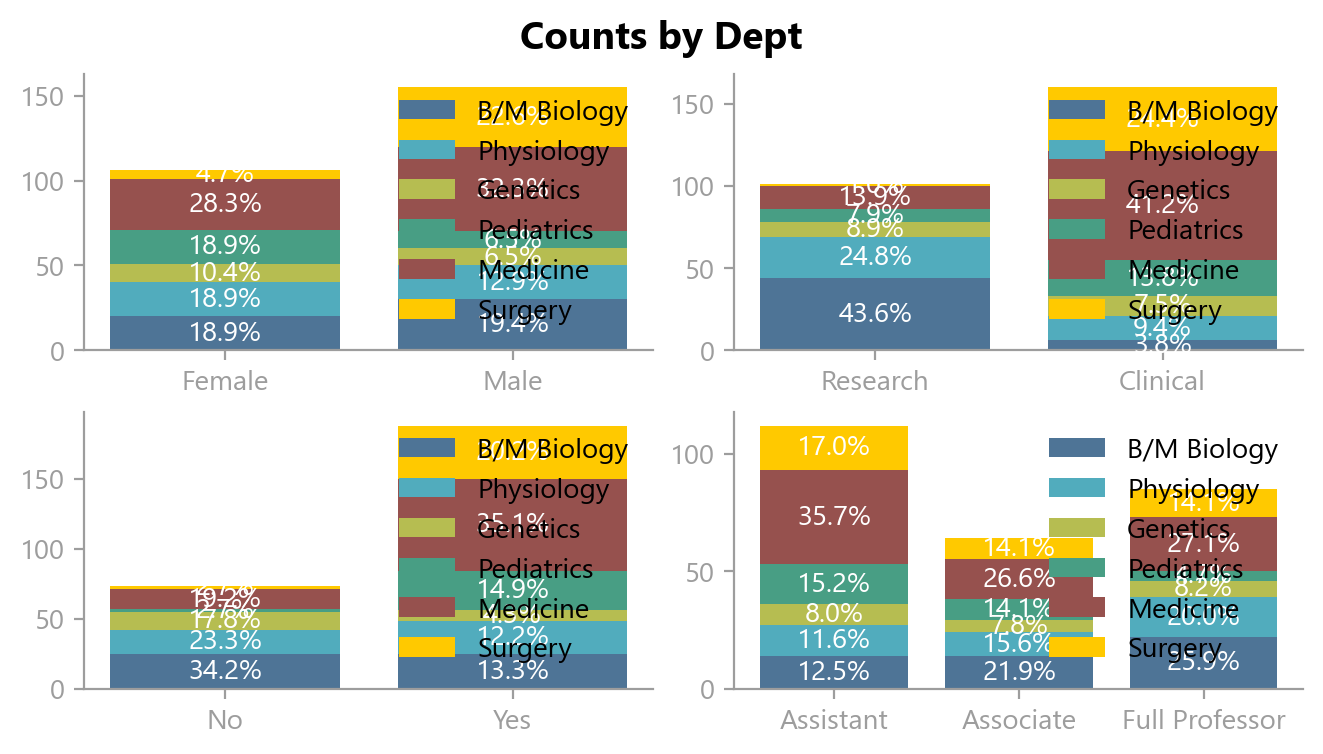

In [16]:
fig, axs = plt.subplots(2, 2, layout='constrained')
cats = df.select_dtypes('category').columns.to_list()
cats.remove('Dept')
title = 'Dept'
counter = 0
for i in range(axs.shape[0]):
    for j in range(axs.shape[1]):
        df_gen = df.groupby([cats[counter], 'Dept']).count()
        df_gen = df_gen.iloc[:, 0].unstack()
        df_gen_per = df_gen.div(df_gen.sum(axis=1), axis=0) * 100
        bottom = np.zeros(df_gen.shape[0])
        for col in df_gen.columns:
            bars = axs[i][j].bar(df_gen.index.to_list(), df_gen[col], label=col, bottom=bottom)
            axs[i][j].bar_label(bars, labels=[f'{p:.1f}%' for p in df_gen_per[col]], label_type='center', color='1')
            bottom += df_gen[col]
        counter += 1
        axs[i][j].legend()
fig.suptitle(f'Counts by {title}')

C:\Users\Shih\AppData\Local\Temp\ipykernel_24484\2500548484.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_gen = df.groupby([cats[counter], 'Emphasis']).count()
C:\Users\Shih\AppData\Local\Temp\ipykernel_24484\2500548484.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_gen = df.groupby([cats[counter], 'Emphasis']).count()
C:\Users\Shih\AppData\Local\Temp\ipykernel_24484\2500548484.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default an

Text(0.5, 0.98, 'Counts by Emphasis')

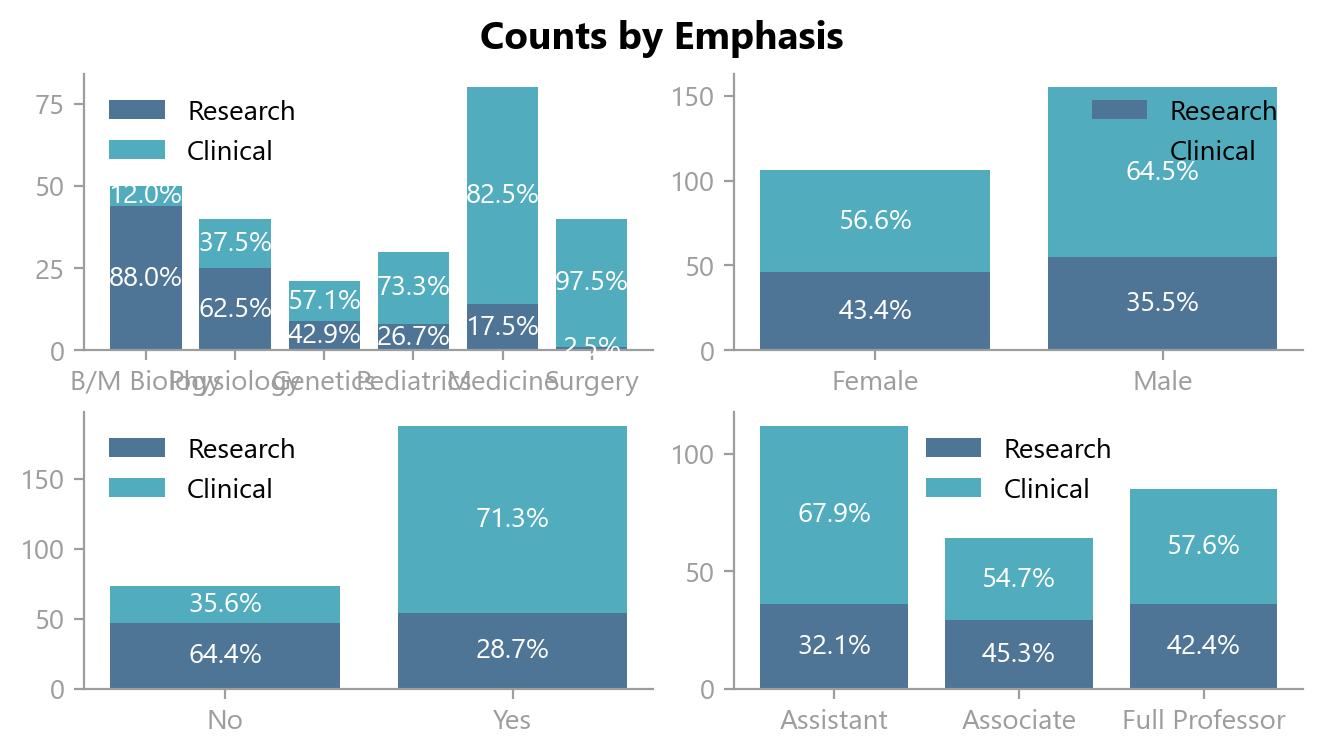

In [17]:
fig, axs = plt.subplots(2, 2, layout='constrained')
cats = df.select_dtypes('category').columns.to_list()
cats.remove('Emphasis')
title = 'Emphasis'
counter = 0
for i in range(axs.shape[0]):
    for j in range(axs.shape[1]):
        df_gen = df.groupby([cats[counter], 'Emphasis']).count()
        df_gen = df_gen.iloc[:, 0].unstack()
        df_gen_per = df_gen.div(df_gen.sum(axis=1), axis=0) * 100
        bottom = np.zeros(df_gen.shape[0])
        for col in df_gen.columns:
            bars = axs[i][j].bar(df_gen.index.to_list(), df_gen[col], label=col, bottom=bottom)
            axs[i][j].bar_label(bars, labels=[f'{p:.1f}%' for p in df_gen_per[col]], label_type='center', color='1')
            bottom += df_gen[col]
        counter += 1
        axs[i][j].legend()
fig.suptitle(f'Counts by {title}')

C:\Users\Shih\AppData\Local\Temp\ipykernel_24484\601860805.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_gen = df.groupby([cats[counter], 'Certified']).count()
C:\Users\Shih\AppData\Local\Temp\ipykernel_24484\601860805.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_gen = df.groupby([cats[counter], 'Certified']).count()
C:\Users\Shih\AppData\Local\Temp\ipykernel_24484\601860805.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and

Text(0.5, 0.98, 'Counts by Certified')

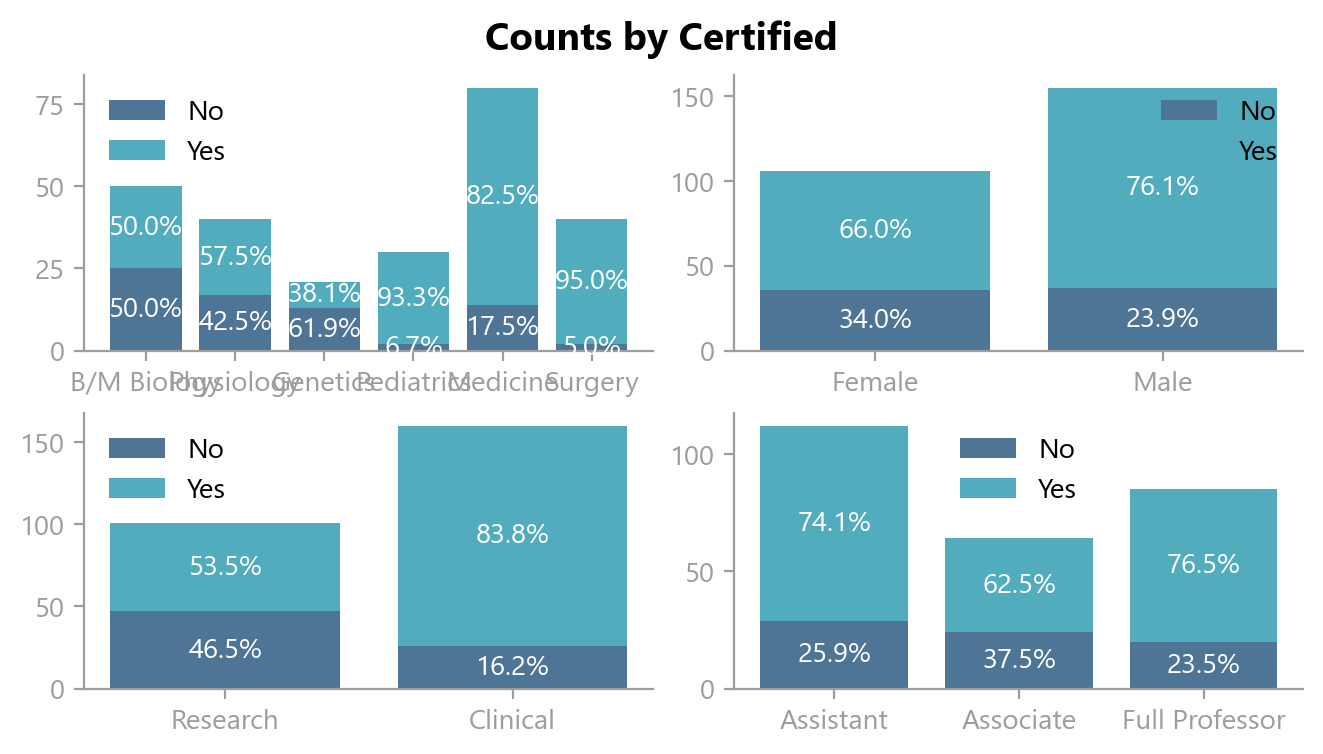

In [18]:
fig, axs = plt.subplots(2, 2, layout='constrained')
cats = df.select_dtypes('category').columns.to_list()
cats.remove('Certified')
title = 'Certified'
counter = 0
for i in range(axs.shape[0]):
    for j in range(axs.shape[1]):
        df_gen = df.groupby([cats[counter], 'Certified']).count()
        df_gen = df_gen.iloc[:, 0].unstack()
        df_gen_per = df_gen.div(df_gen.sum(axis=1), axis=0) * 100
        bottom = np.zeros(df_gen.shape[0])
        for col in df_gen.columns:
            bars = axs[i][j].bar(df_gen.index.to_list(), df_gen[col], label=col, bottom=bottom)
            axs[i][j].bar_label(bars, labels=[f'{p:.1f}%' for p in df_gen_per[col]], label_type='center', color='1')
            bottom += df_gen[col]
        counter += 1
        axs[i][j].legend()
fig.suptitle(f'Counts by {title}')

C:\Users\Shih\AppData\Local\Temp\ipykernel_24484\3513115393.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_gen = df.groupby([cats[counter], 'Rank']).count()
C:\Users\Shih\AppData\Local\Temp\ipykernel_24484\3513115393.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_gen = df.groupby([cats[counter], 'Rank']).count()
C:\Users\Shih\AppData\Local\Temp\ipykernel_24484\3513115393.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silenc

Text(0.5, 0.98, 'Counts by Rank')

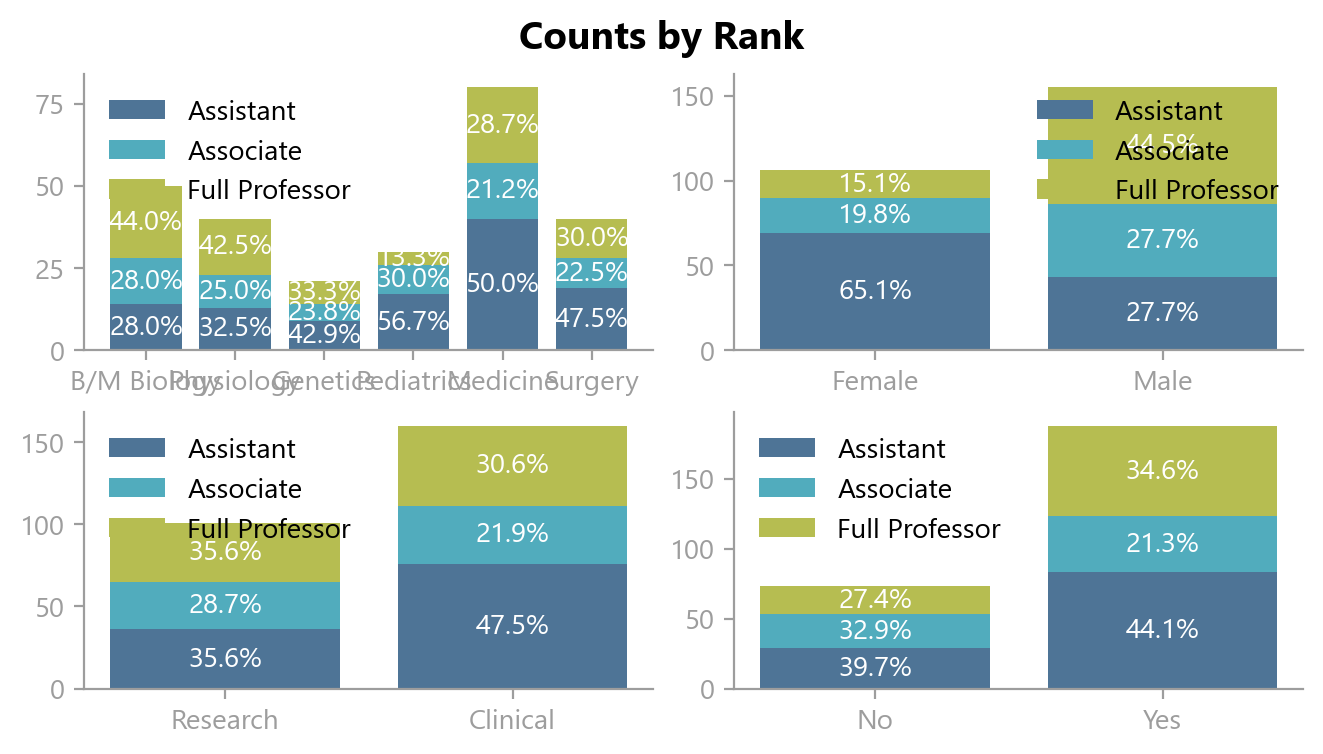

In [19]:
fig, axs = plt.subplots(2, 2, layout='constrained')
cats = df.select_dtypes('category').columns.to_list()
cats.remove('Rank')
title = 'Rank'
counter = 0
for i in range(axs.shape[0]):
    for j in range(axs.shape[1]):
        df_gen = df.groupby([cats[counter], 'Rank']).count()
        df_gen = df_gen.iloc[:, 0].unstack()
        df_gen_per = df_gen.div(df_gen.sum(axis=1), axis=0) * 100
        bottom = np.zeros(df_gen.shape[0])
        for col in df_gen.columns:
            bars = axs[i][j].bar(df_gen.index.to_list(), df_gen[col], label=col, bottom=bottom)
            axs[i][j].bar_label(bars, labels=[f'{p:.1f}%' for p in df_gen_per[col]], label_type='center', color='1')
            bottom += df_gen[col]
        counter += 1
        axs[i][j].legend()
fig.suptitle(f'Counts by {title}')

#### Numerical

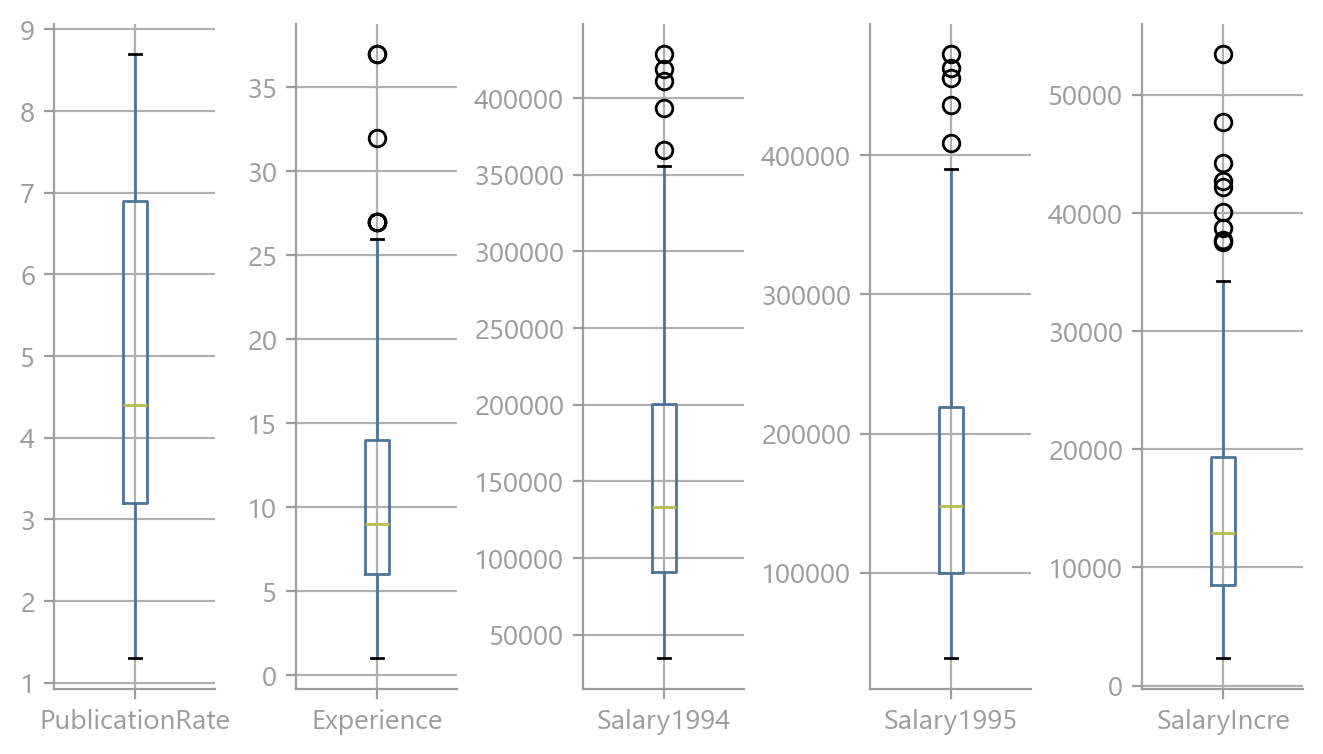

In [20]:
nums = df.select_dtypes('number').columns
fig, axs = plt.subplots(1, 5, layout='constrained')
for i in range(axs.shape[0]):
    df[nums].boxplot(column=nums[i], ax=axs[i])

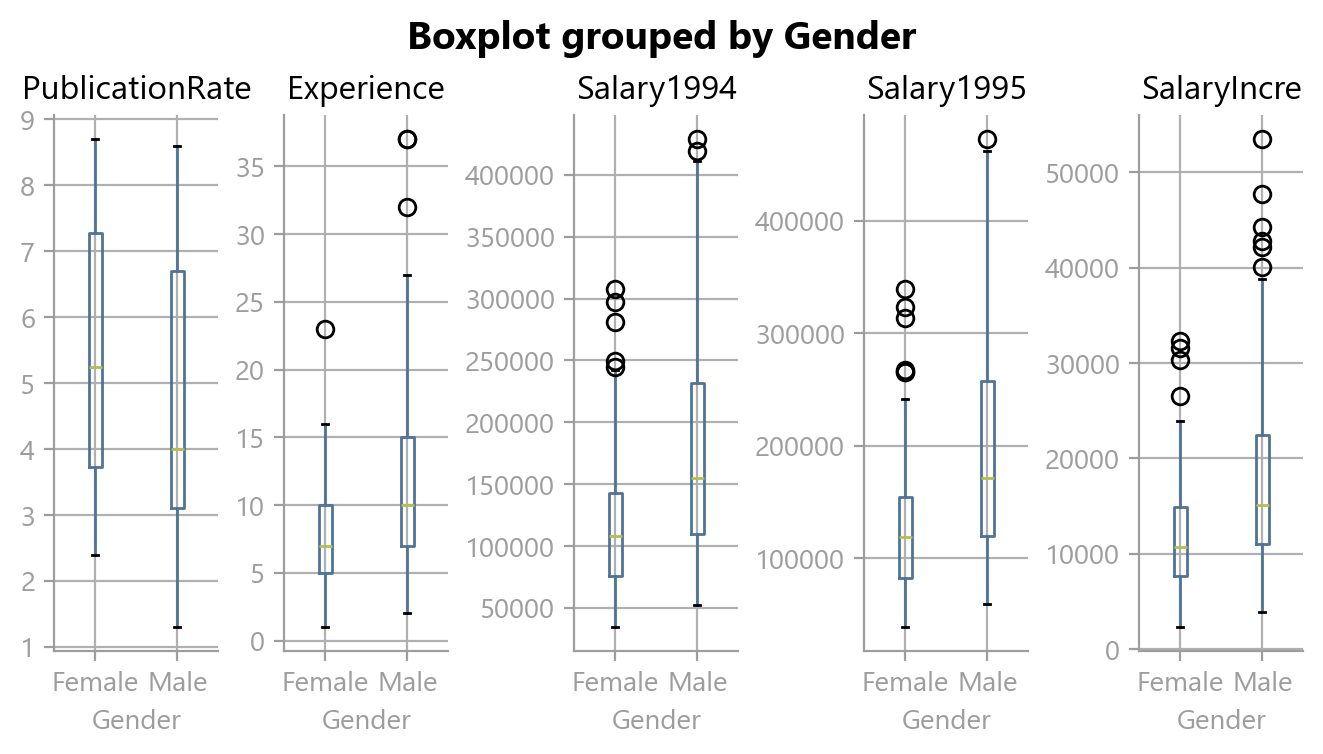

In [21]:
nums_grouper = df.select_dtypes('number').columns.to_list() + ['Gender']
fig, axs = plt.subplots(1, 5, layout='constrained')
for i in range(axs.shape[0]):
    df[nums_grouper].boxplot(column=nums_grouper[i], ax=axs[i], by='Gender')

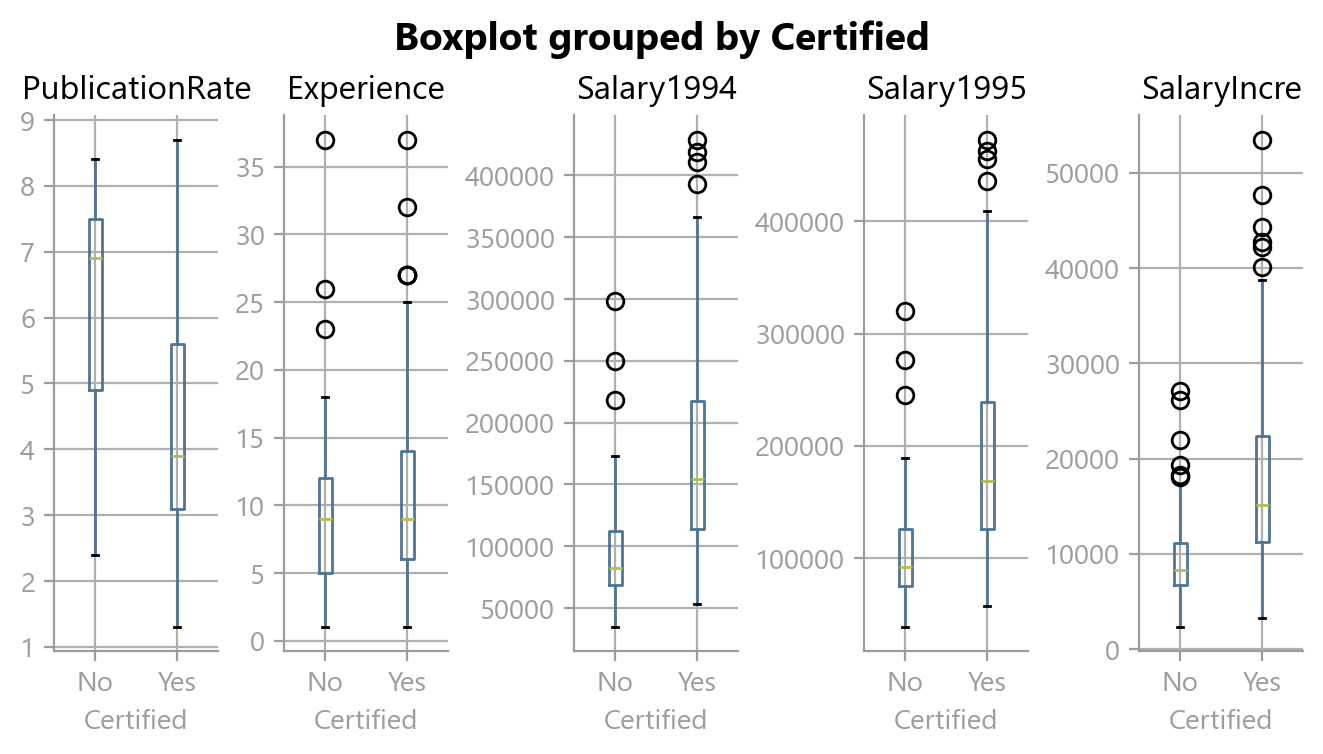

In [22]:
nums_grouper = df.select_dtypes('number').columns.to_list() + ['Certified']
fig, axs = plt.subplots(1, 5, layout='constrained')
for i in range(axs.shape[0]):
    df[nums_grouper].boxplot(column=nums_grouper[i], ax=axs[i], by='Certified')

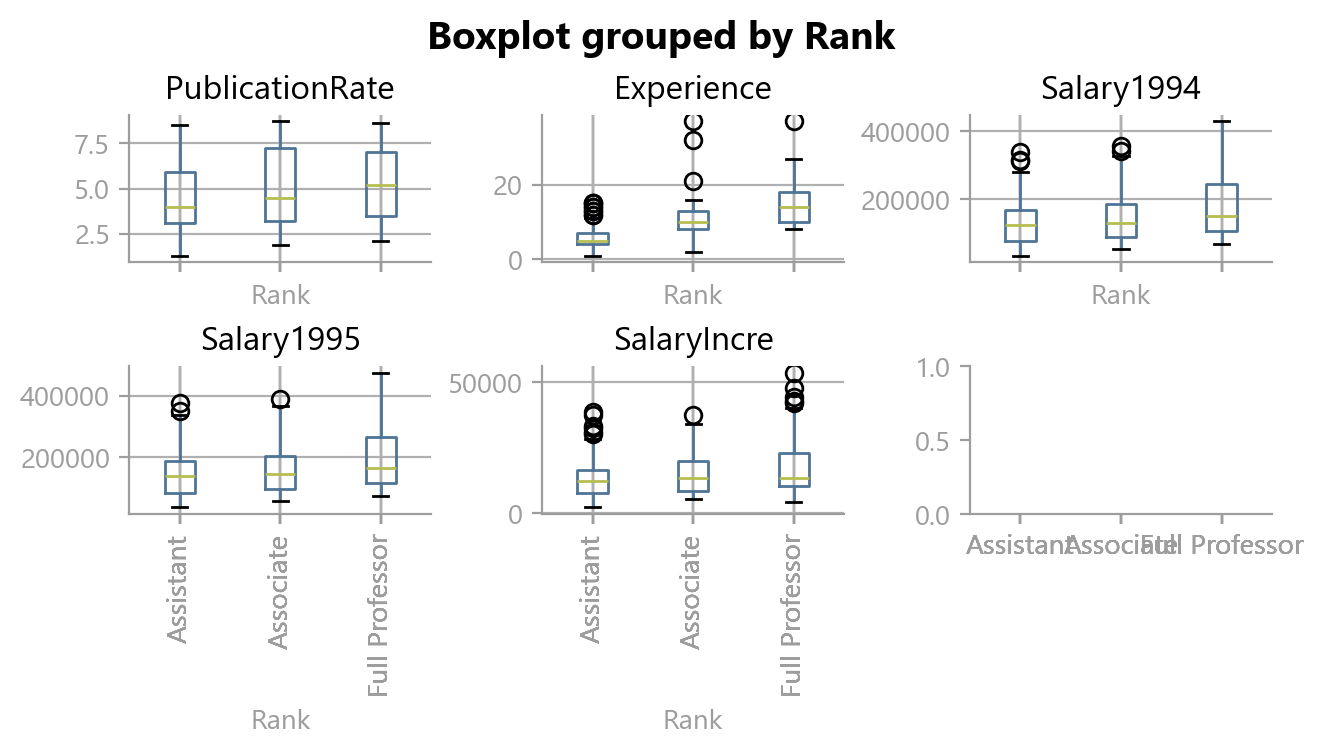

In [23]:
nums_grouper = df.select_dtypes('number').columns.to_list() + ['Rank']
fig, axs = plt.subplots(2, 3, layout='constrained', sharex=True)
counter = 0
for i in range(axs.shape[0]):
    for j in range(axs.shape[1]):
        if counter == len(nums_grouper) - 1:
            break
        df[nums_grouper].boxplot(column=nums_grouper[counter], ax=axs[i][j], by='Rank', rot=90)
        counter += 1

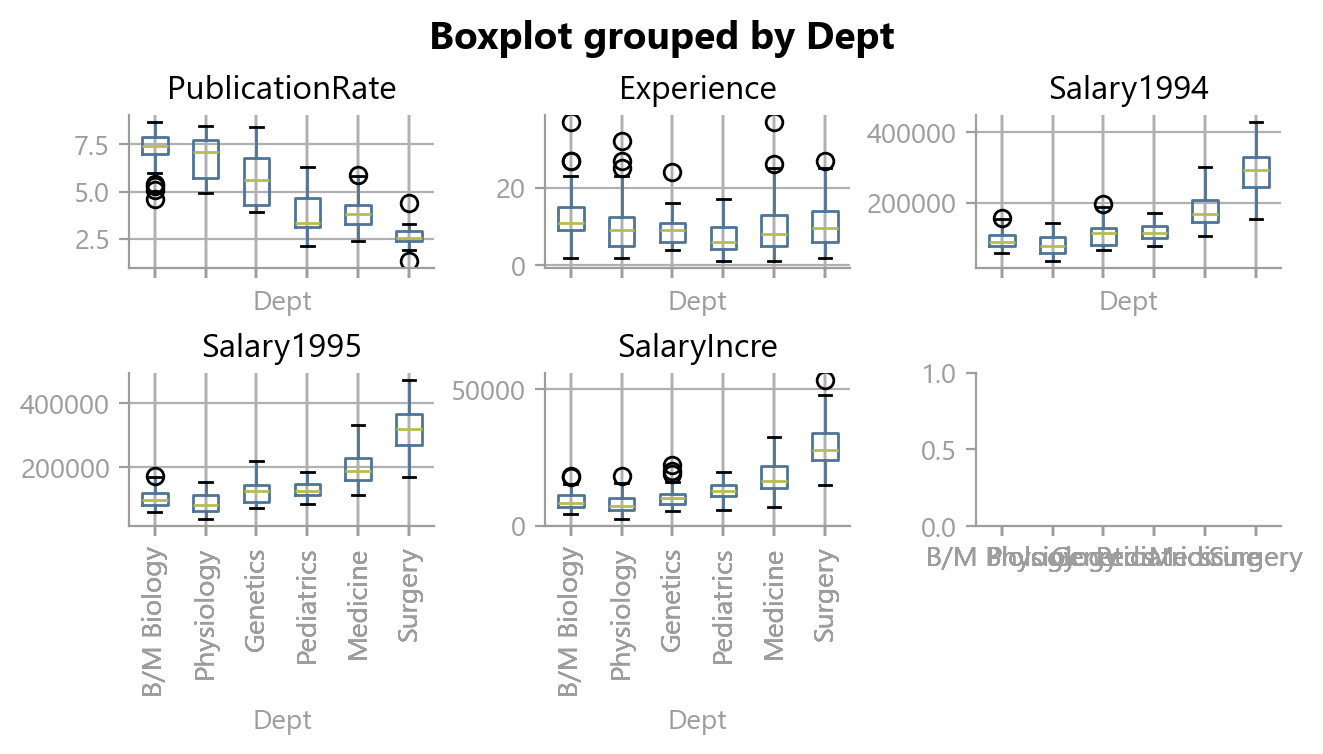

In [24]:
nums_grouper = df.select_dtypes('number').columns.to_list() + ['Dept']
fig, axs = plt.subplots(2, 3, layout='constrained', sharex=True)
counter = 0
for i in range(axs.shape[0]):
    for j in range(axs.shape[1]):
        if counter == len(nums_grouper) - 1:
            break
        ax = df[nums_grouper].boxplot(column=nums_grouper[counter], ax=axs[i][j], by='Dept', rot=90)
        ax.set
        counter += 1

In [25]:
df.groupby('Gender')[df.select_dtypes('number').columns].describe().T

C:\Users\Shih\AppData\Local\Temp\ipykernel_24484\2823190945.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Gender')[df.select_dtypes('number').columns].describe().T


Gender                        Female           Male
PublicationRate count     106.000000     155.000000
                mean        5.350000       4.646452
                std         1.886052       1.937909
                min         2.400000       1.300000
                25%         3.725000       3.100000
                50%         5.250000       4.000000
                75%         7.275000       6.700000
                max         8.700000       8.600000
Experience      count     106.000000     155.000000
                mean        7.490566      12.103226
                std         4.166180       6.703531
                min         1.000000       2.000000
                25%         5.000000       7.000000
                50%         7.000000      10.000000
                75%        10.000000      15.000000
                max        23.000000      37.000000
Salary1994      count     106.000000     155.000000
                mean   118871.273585  177338.761290
                std     56168.005758   85930.539592
                min     34514.000000   52582.000000
                25%     75774.500000  109687.000000
                50%    108457.000000  155006.000000
                75%    143096.000000  231501.500000
                max    308081.000000  428876.000000
Salary1995      count     106.000000     155.000000
                mean   130876.915094  194914.090323
                std     62034.507306   94902.727608
                min     38675.000000   58923.000000
                25%     82345.250000  119952.500000
                50%    119135.000000  170967.000000
                75%    154170.500000  257163.000000
                max    339664.000000  472589.000000
SalaryIncre     count     106.000000     155.000000
                mean    12005.641509   17575.329032
                std      6317.993033    9727.363746
                min      2312.000000    3910.000000
                25%      7662.750000   10972.000000
                50%     10719.000000   15158.000000
                75%     14945.750000   22472.500000
                max     32342.000000   53460.000000

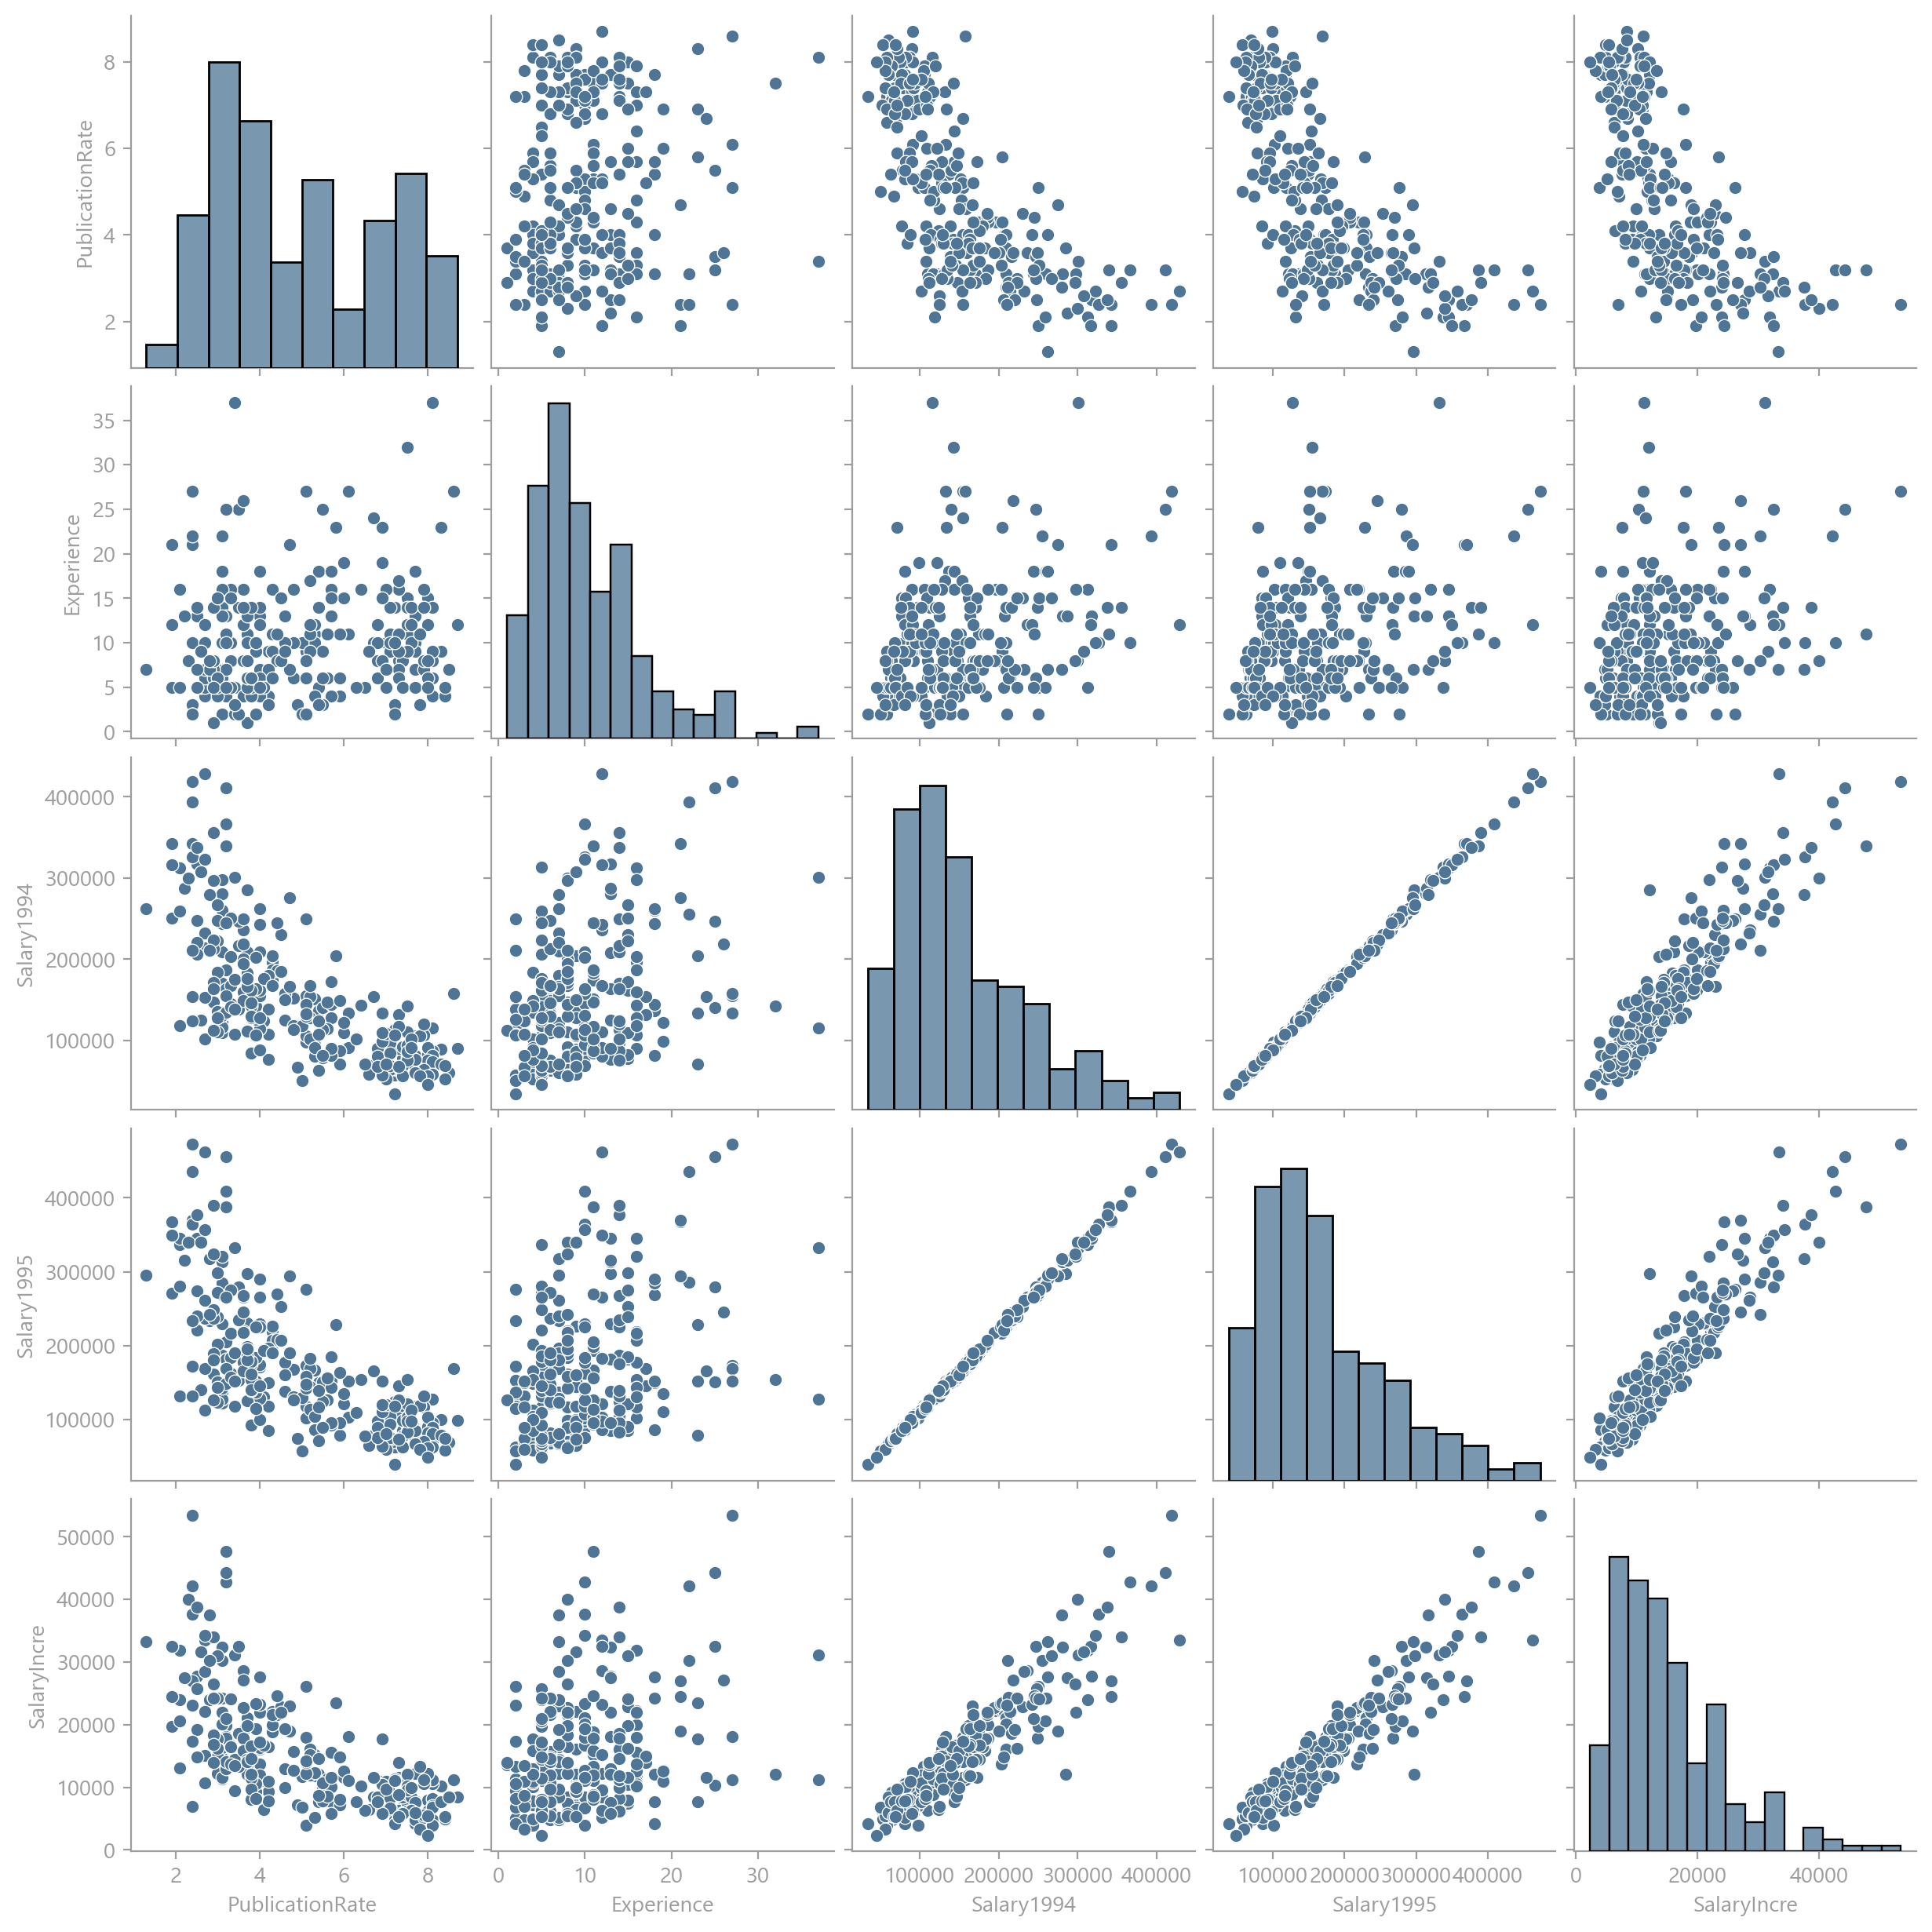

In [26]:
import seaborn as sns
sns.pairplot(df.select_dtypes('number'))

### Modelling

#### Regression

In [27]:
df_dummies = pd.get_dummies(df)
df_dummies = df_dummies.loc[:, df_dummies.columns != 'Gender_Male']

In [28]:
from sklearn.linear_model import LogisticRegression
X, y = df_dummies.loc[:, df_dummies.columns != 'Gender_Female'].astype('float64').values, df_dummies['Gender_Female'].astype('float64').values 
model = LogisticRegression(max_iter=10000).fit(X, y)

In [29]:
for name, coef in zip(df_dummies.loc[:, df_dummies.columns != 'Gender_Female'].columns, model.coef_.ravel()):
    print(f'{name:<20}{coef:>5.2f}')

PublicationRate      0.78
Experience          -0.12
Salary1994          -0.00
Salary1995           0.00
SalaryIncre          0.00
Dept_B/M Biology    -0.80
Dept_Physiology     -0.53
Dept_Genetics       -0.10
Dept_Pediatrics      1.20
Dept_Medicine        0.13
Dept_Surgery        -0.31
Emphasis_Research   -1.01
Emphasis_Clinical    0.60
Certified_No        -0.21
Certified_Yes       -0.20
Rank_Assistant       0.52
Rank_Associate      -0.39
Rank_Full Professor -0.54


In [31]:
import statsmodels.api as sm
log_reg = sm.Logit(df_dummies['Gender_Female'].astype('float64'), df_dummies.loc[:, df_dummies.columns != 'Gender_Female'].astype('float64')).fit(maxiter=100)

Optimization terminated successfully.
         Current function value: 0.490964
         Iterations 71


In [32]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Gender_Female   No. Observations:                  261
Model:                          Logit   Df Residuals:                      246
Method:                           MLE   Df Model:                           14
Date:                Sat, 14 Sep 2024   Pseudo R-squ.:                  0.2731
Time:                        20:52:16   Log-Likelihood:                -128.14
converged:                       True   LL-Null:                       -176.28
Covariance Type:            nonrobust   LLR p-value:                 2.433e-14
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
PublicationRate         1.2659      0.338      3.742      0.000       0.603       1.929
Experience             -0.1146      0.047     -2.450      0.014      -0.206      -0.023
Salary1994              0.0006        nan        nan        nan         nan         nan
Salary1995             -0.0006        nan        nan        nan         nan         nan
SalaryIncre             0.0006        nan        nan        nan         nan         nan
Dept_B/M Biology       -2.0050   1.99e+07  -1.01e-07      1.000   -3.91e+07    3.91e+07
Dept_Physiology        -1.7068    1.7e+07     -1e-07      1.000   -3.34e+07    3.34e+07
Dept_Genetics          -0.8180   1.96e+07  -4.18e-08      1.000   -3.83e+07    3.83e+07
Dept_Pediatrics         1.3479   1.84e+07   7.34e-08      1.000    -3.6e+07     3.6e+07
Dept_Medicine          -0.2311    1.9e+07  -1.22e-08      1.000   -3.73e+07    3.73e+07
Dept_Surgery           -0.5143   1.76e+07  -2.93e-08      1.000   -3.44e+07    3.44e+07
Emphasis_Research      -3.2424   4.55e+07  -7.13e-08      1.000   -8.91e+07    8.91e+07
Emphasis_Clinical      -0.6848   4.73e+07  -1.45e-08      1.000   -9.28e+07    9.28e+07
Certified_No           -1.8862   2.57e+07  -7.35e-08      1.000   -5.03e+07    5.03e+07
Certified_Yes          -2.0411   2.54e+07  -8.04e-08      1.000   -4.98e+07    4.98e+07
Rank_Assistant         -0.5471   4.91e+07  -1.11e-08      1.000   -9.63e+07    9.63e+07
Rank_Associate         -1.5375   4.91e+07  -3.13e-08      1.000   -9.63e+07    9.63e+07
Rank_Full Professor    -1.8428   4.91e+07  -3.75e-08      1.000   -9.63e+07    9.63e+07
=======================================================================================
"""

#### CART

In [47]:
# Baseline for each categorial attribute
{i:df[i].cat.categories[0] for i in df.select_dtypes('category').columns}

{'Dept': 'B/M Biology',
 'Gender': 'Female',
 'Emphasis': 'Research',
 'Certified': 'No',
 'Rank': 'Assistant'}

In [ ]:
# Ignore it now
# Prepare target (Y) variable into 3 categories
# from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()
# target = encoder.fit_transform(df['Rank'])

In [4]:
# Prepare target (Y) variable
target = pd.get_dummies(df['Rank'])['Full Professor']

In [3]:
# Prepare X variables
df_dummies_drop_first = pd.get_dummies(df.loc[:, df.columns != 'Rank'], drop_first=True)
df_dummies_drop_first

,PublicationRate,Experience,Salary1994,Salary1995,SalaryIncre,Dept_Physiology,Dept_Genetics,Dept_Pediatrics,Dept_Medicine,Dept_Surgery,Gender_Male,Emphasis_Clinical,Certified_Yes
ID,,,,,,,,,,,,,
1,7.4,9,77836,84612,6776,False,False,False,False,False,True,False,False
2,6.7,10,69994,78497,8503,False,False,False,False,False,True,False,False
3,8.1,6,62872,67756,4884,False,False,False,False,False,True,False,False
4,5.1,27,155196,173220,18024,False,False,False,False,False,True,True,True
5,7.0,10,89268,96099,6831,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,2.9,8,297174,323699,26525,False,False,False,False,True,False,True,True
258,2.6,9,308081,339664,31583,False,False,False,False,True,False,True,True
259,2.8,8,211269,241577,30308,False,False,False,False,True,False,True,True


In [ ]:
# Balance the dataset
# data = df_dummies_drop_first.join(target)
# data_prof = data[data['Full Professor']==True]
# data_not_prof = data[data['Full Professor']==False]
# balanced = pd.concat([data_not_prof.sample(data_prof.shape[0], random_state=42), data_prof])
# df_dummies_drop_first = balanced.loc[:, balanced.columns != 'Full Professor']
# target = balanced['Full Professor']

In [5]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42)

path = tree.cost_complexity_pruning_path(df_dummies_drop_first, target)
alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

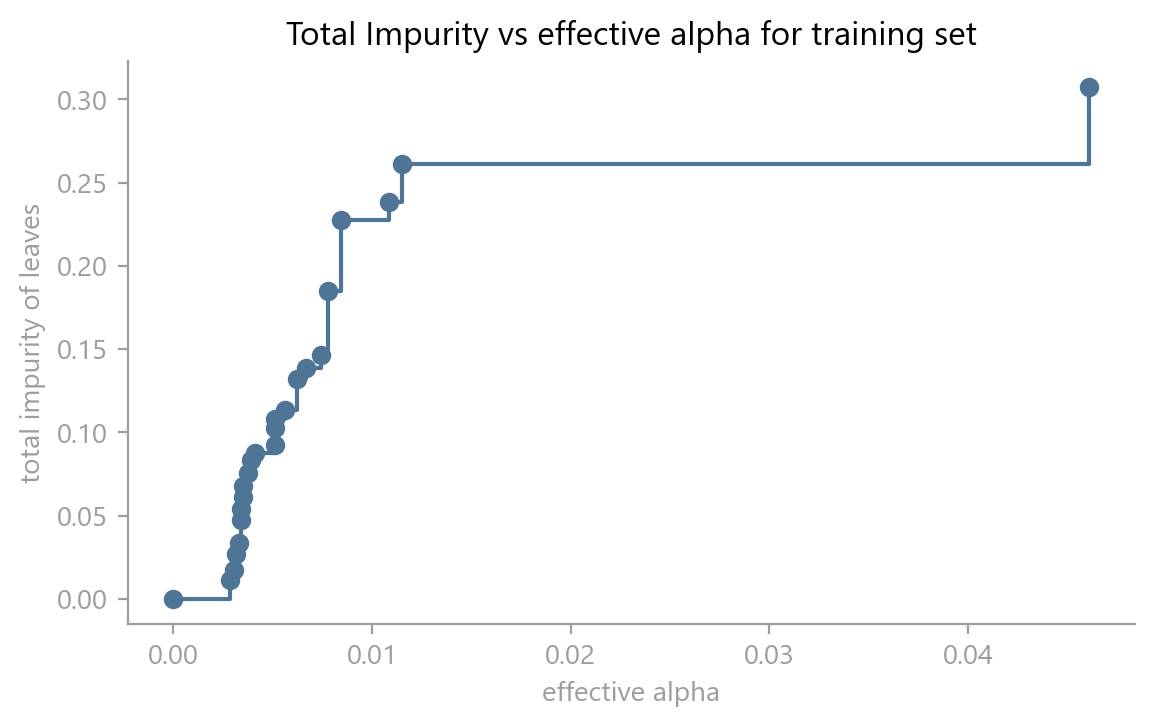

In [6]:
fig, ax = plt.subplots()
ax.plot(alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [7]:
trees = []
for alpha in alphas:
    tree = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    tree.fit(df_dummies_drop_first, target)
    trees.append(tree)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        trees[-1].tree_.node_count, alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.13175555365949204


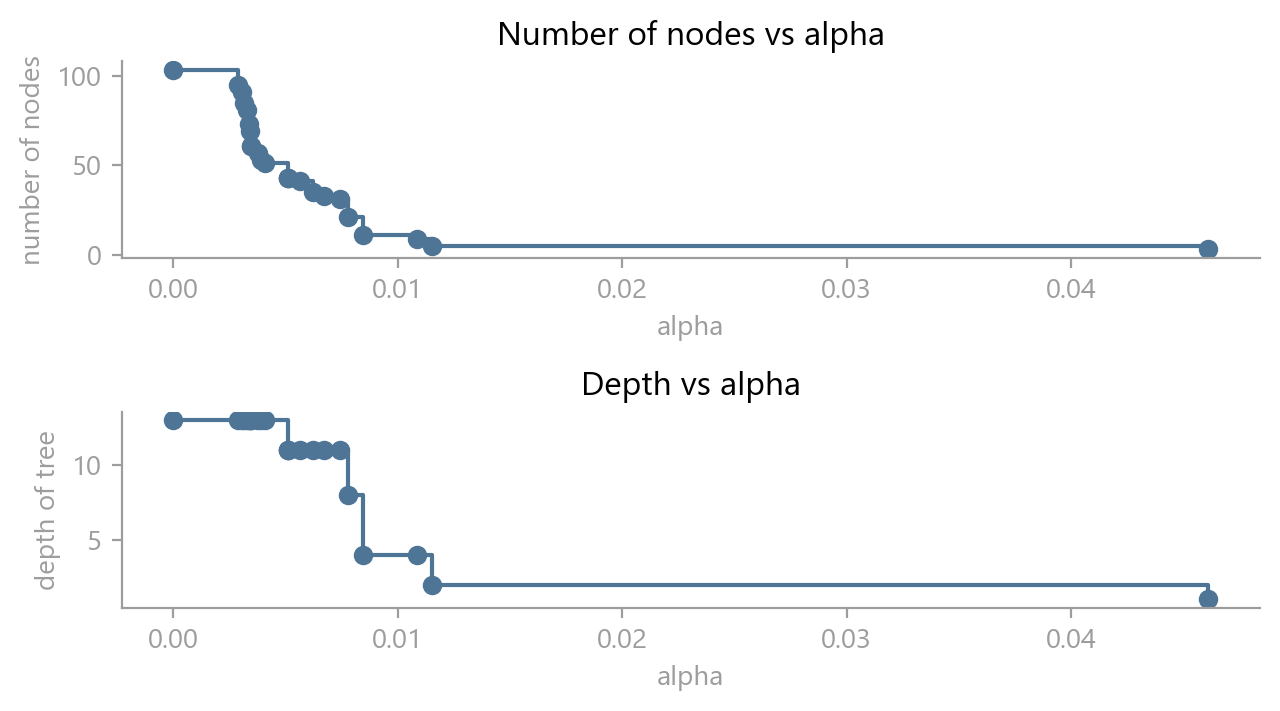

In [8]:
trees = trees[:-1]
alphas = alphas[:-1]

node_counts = [clf.tree_.node_count for clf in trees]
depth = [clf.tree_.max_depth for clf in trees]
fig, ax = plt.subplots(2, 1)
ax[0].plot(alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [9]:
# Perform 10 fold cv
from sklearn.model_selection import cross_val_score
scores=[]
stdErrs = []

for tree in trees:
    score = cross_val_score(tree, df_dummies_drop_first, target, cv=10)
    stdErr = score.std()
    scores.append(score.mean())
    stdErrs.append(stdErr)

df_alpha = pd.DataFrame({'alpha':alphas, 'Nodes':node_counts, 'Depth':depth, 'Score':scores, 'STDERR':stdErrs})
df_alpha = df_alpha.sort_values('alpha', ascending=False)
df_alpha

,alpha,Nodes,Depth,Score,STDERR
23,0.046105,3,1,0.766239,0.090191
22,0.011534,5,2,0.750855,0.088350
21,0.010856,9,4,0.758547,0.092849
20,0.008444,11,4,0.747293,0.083957
19,0.007785,21,8,0.747293,0.083957
18,0.007424,31,11,0.747436,0.085051
17,0.006701,33,11,0.751425,0.089402
16,0.006244,35,11,0.747578,0.086007
15,0.005634,41,11,0.732051,0.097882
13,0.005109,43,11,0.731909,0.096910


In [10]:
# Find the best tree base on 1 stderr rule
best_score = df_alpha.iloc[df_alpha['Score'].argmax(), :]
floor = best_score['Score'] - best_score['STDERR']
index_simple = df_alpha[df_alpha['Score'] > floor]['Nodes'].argmin()
best_alpha = df_alpha.iloc[index_simple, :]['alpha']

In [11]:
tree_best = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
tree_best.fit(df_dummies_drop_first, target)
tree_best.feature_importances_

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

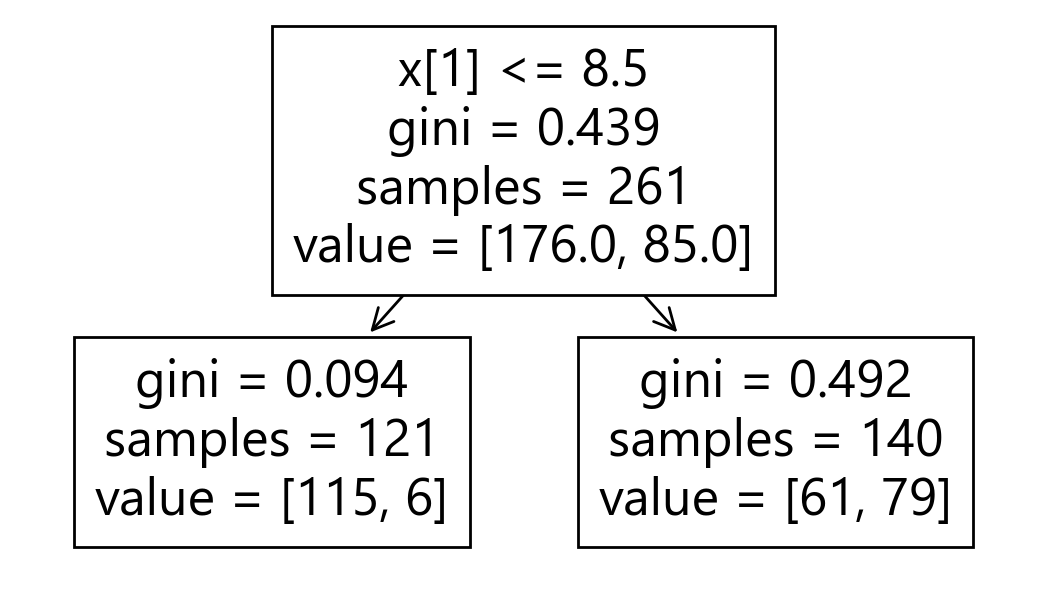

In [13]:
from sklearn import tree
tree.plot_tree(tree_best);